In [2]:
import matplotlib.pyplot as plt
import numpy as np

def euler(f, x0, x1, y0, h):
    n = int((x1 - x0) / h)
    x = np.linspace(x0, x1, n + 1)
    y = np.zeros(n + 1)
    y[0] = y0
    for i in range(0, n):
        y[i + 1] = y[i] + h * f(x[i], y[i])
    
    return (x, y)

def gen_campo(v):

    u = 1

    n = np.sqrt(u ** 2 + v ** 2)

    u, v = u/n, v/n

    plt.quiver(x, y, u, v)
    plt.grid()

## Pregunta 1

La siguiente ecuación diferencial 
$$ y' = \sin(x^2) $$
es separable y su solución general está dada por 
$$ y = \int \sin(x^2) dx $$
pero $f(x)= \sin(x^2)$ no tiene primitiva, por ende no es posible determinar una solución explícita. A pesar de lo anterior, es posible estudiar su comportamiento de manera numérica, dada una condición inicial.

Considere el PVI

$$  y'=  \sin(x^2) \quad ; \quad y(0) = 2$$

* a) Utilizando el método de Euler, determine una aproximación de $y(10)$ en las siguientes condiciones
    
    * Cantidad de iteraciones $n=300$
    * Paso $h=0,1$ 

* b)  El valor de $y(10)$ se puede aproximar mediante la integral de Fresnel, dado por

$$ y(10)\approx 
0.7625617651416596 $$

Suponga que este es el valor real de $y(10)$ y calcule el error cometido en cada uno de los casos anteriores. Concluya cuál es una mejor aproximación.

## Solución:

El resultado de la aproximacion a y(10) de h = 0.1 es 2.6244088307501436 y de n = 300 es 2.5937190614483097
El error de h = 0.1 es 1.8618470707501436 y de n = 300 es 1.8311573014483096
y la diferencia entre estos es 0.03068976930183398


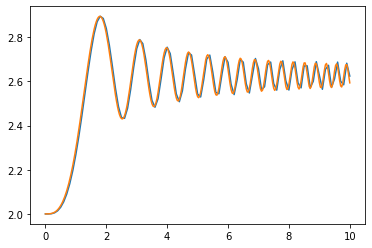

In [3]:
f1 = lambda x, y: np.sin(x**2)
x0 = 0
y0 = 2
x1 = 10
h = 0.1
n = 10 / 300

(xs1, ys1) = euler(f1, x0, x1, y0, h)
plt.plot(xs1, ys1)
error1 = np.abs(ys1[-1] - 0.76256176)
(x2s1, y2s1) = euler(f1, x0, x1, y0, n)
plt.plot(x2s1, y2s1)
error2 = np.abs(y2s1[-1] - 0.76256176)

print(f"El resultado de la aproximacion a y(10) de h = 0.1 es {ys1[-1]} y de n = 300 es {y2s1[-1]}")

print(f"El error de h = 0.1 es {error1} y de n = 300 es {error2}")
print(f"y la diferencia entre estos es {np.abs(error1 - error2)}")

b) La mejor aproximación entre las 2 es la que itera 300 veces, ya que si bien la diferencia entre estos es muy poca el error obtenido es menor

## Pregunta 2

La siguiente EDO se denomina modelo logístico y se utiliza para modelar el crecimiento de una población y se utiliza cuando el crecimiento poblacional está limitado por algún factor propio del entorno (por ejemplo alimento o espacio de habitat limitado)

$$ \dfrac{dP}{dt} = k\left( 1- \frac{P}{N}  \right) P $$

donde 

* $t$ representa el tiempo (variable independiente)
* $P$ representa la población en el instante $t$ (variable dependiente)
* $k$ coeficiente de crecimiento para poblaciones pequeñas
* $N$ coeficiente de "capacidad" del ambiente 

El modelo anterior corresponde a una EDO **separable** y **autónoma**.

Suponga que para cierta población de bacterias, $k=3$ y la capacidad del medio en que se encuentran corresponde a $N=10$ (medidos en miles, al igual que $P$).

* a) Bajo las condiciones dadas, determine (si es posible) la(s) población(es) de equilibrio.
* b) Sin resolver la EDO y solo con métodos cualitativos, determine $\displaystyle\lim_{t \to \infty} P(t)$ para diferentes poblaciones iniciales. Determine cuál es la población de bacterias que se mantiene a lo largo del tiempo. Justifique su respuesta con herramientas vistas en clases.



## Solución:

Grafico de comportamiento general: 


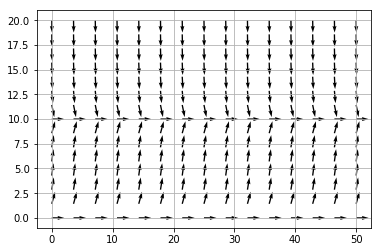

In [3]:
x, y = np.meshgrid(np.linspace(0, 50, 15), np.linspace(0, 20, 15))
v = 3 * (1 - (y / 10)) * y 
gen_campo(v)
print("Grafico de comportamiento general: ")

Grafico de comportamiento cercano a 0: 


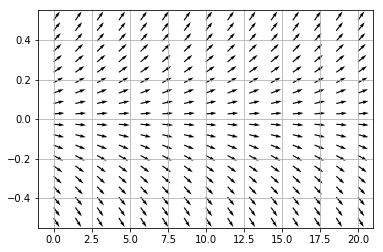

In [4]:
x, y = np.meshgrid(np.linspace(0, 20, 15), np.linspace(-.5, .5, 20))
v = 3 * (1 - (y / 10)) * y 
gen_campo(v)
print("Grafico de comportamiento cercano a 0: ")

Grafico de comportamiento cercano a 10: 


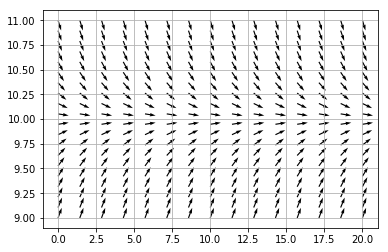

In [5]:
x, y = np.meshgrid(np.linspace(0, 20, 15), np.linspace(9, 11, 20))
v = 3 * (1 - (y / 10)) * y 
gen_campo(v)
print("Grafico de comportamiento cercano a 10: ")

a) se establece que la poblacion de equilibrio esta en 10, ya que cuando se evalua la ecuacion entregada con P = 10 esta equivale a 0 indicando que en este punto ya no puede crecer mas

b) el limite de P cuanto t es infinito es 10 mil y la poblacion de bacterias que se mantiene con el tiempo puede ser 0 o 10 mil, dado que en 0 se mantiene constante y cuando este es distinto de 0, llega a 10 mil y para mantiene en este punto, en el caso de que la poblacion sea mayor a 10 mil esta se vera reducida hasta llegar a esta constante, como se puede ver en los graficos en y = 10 se puede observar que este actua como atractor e y = 0 como repulsor pero cuando se inicia en uno de estos 2 punto, estos se mantienen constantes.